In [118]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [119]:
train_data  =  pd.read_csv(r"/content/training_data (1).csv",index_col=False)

In [120]:
test_data  =  pd.read_csv(r"/content/test_data (1).csv",index_col=False)

In [121]:
print(train_data.shape)

train_data.head()

(139446, 9)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,no_toxicity
0,da436ad42040d6df,; 25 March 2013 (UTC). . That's some strange i...,0,0,0,0,0,0,1
1,d1dde89e13a40d9e,". {| style=""background-color: #F5FFFA; padding...",0,0,0,0,0,0,1
2,521e64c55abc6137,I see that my edits have apparently been rever...,0,0,0,0,0,0,1
3,5c5d871fac358990,Art of War/Wall Street Quote. I have just pull...,0,0,0,0,0,0,1
4,4cfff81b9d14275d,. . Do either of them have a source? Unless th...,0,0,0,0,0,0,1


In [122]:
filter = train_data["comment_text"] != ""
train_data = train_data[filter]
train_data = train_data.dropna()

In [123]:
print(train_data["comment_text"][168])

okay this is ridiculous the page i made was an actual person. He is real and suicidal and you calling him unimportant isn't helping things. If Simon Cowell is important enough to have a wikipedia page i don't see why any other normal human being isnt.


In [124]:
print("Toxic:" + str(train_data["toxic"][168]))
print("Severe_toxic:" + str(train_data["severe_toxic"][168]))
print("Obscene:" + str(train_data["obscene"][168]))
print("Threat:" + str(train_data["threat"][168]))
print("Insult:" + str(train_data["insult"][168]))
print("Identity_hate:" + str(train_data["identity_hate"][168]))

Toxic:0
Severe_toxic:0
Obscene:0
Threat:0
Insult:0
Identity_hate:0


In [125]:
toxic_comments_labels = train_data[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", "no_toxicity"]]
toxic_comments_labels.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,no_toxicity
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


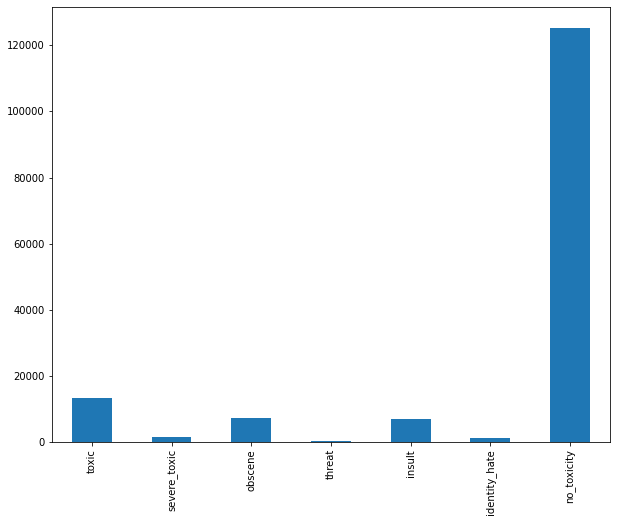

In [126]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

toxic_comments_labels.sum(axis=0).plot.bar()

In [127]:
comments = train_data.drop(['id','comment_text'],axis = 1)
for i in comments.columns :
    print("Percent of {0}s: ".format(i), round(100*comments[i].mean(),2), "%")

Percent of toxics:  9.6 %
Percent of severe_toxics:  1.01 %
Percent of obscenes:  5.32 %
Percent of threats:  0.31 %
Percent of insults:  4.95 %
Percent of identity_hates:  0.89 %
Percent of no_toxicitys:  89.82 %


Data Sampling

In [128]:
train_data['no_toxicity'].value_counts()

1    125247
0     14199
Name: no_toxicity, dtype: int64

In [129]:
# separating the data for analysis
toxic = train_data[train_data.no_toxicity == 0]
non_toxic = train_data[train_data.no_toxicity == 1]

In [130]:
non_toxic_sample = non_toxic.sample(n=15000)

In [131]:
new_dataset = pd.concat([non_toxic_sample, toxic], axis=0)

In [132]:
print(f'Classes Count in Dataset \n', pd.value_counts(new_dataset['no_toxicity'], sort = True).sort_index())

Classes Count in Dataset 
 0    14199
1    15000
Name: no_toxicity, dtype: int64


In [133]:
train_data = new_dataset

In [134]:
train_data.shape

(29199, 9)

In [135]:
toxic_comments_labels = train_data[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", "no_toxicity"]]
toxic_comments_labels.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,no_toxicity
42710,0,0,0,0,0,0,1
38289,0,0,0,0,0,0,1
114218,0,0,0,0,0,0,1
89390,0,0,0,0,0,0,1
110213,0,0,0,0,0,0,1


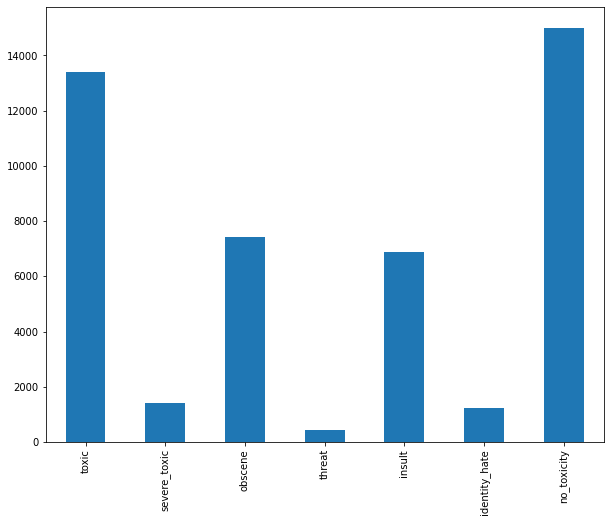

In [136]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

toxic_comments_labels.sum(axis=0).plot.bar()

In [137]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [138]:
X = []
sentences = list(train_data["comment_text"])
for sen in sentences:
    X.append(preprocess_text(sen))
testing = []    
sentences = list(test_data["comment_text"])
for sen in sentences:
    testing.append(preprocess_text(sen))
y = toxic_comments_labels.values

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [140]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
testing = tokenizer.texts_to_sequences(testing)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)



In [141]:
testing =  pad_sequences(testing, padding='post', maxlen=maxlen)

In [142]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip

In [143]:
#!unzip glove*.zip

In [144]:
!ls
!pwd

 glove.6B.100d.txt   glove.6B.zip      'test_data (1).csv'
 glove.6B.200d.txt   glove.6B.zip.1    'training_data (1).csv'
 glove.6B.300d.txt   model_plot4a.png
 glove.6B.50d.txt    sample_data
/content


In [145]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('/content/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Stacked LSTM

In [146]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Concatenate

In [147]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
LSTM_Layer_2 = LSTM(128)(embedding_layer)
LSTM_Layer_3 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(7, activation='sigmoid')(LSTM_Layer_3)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [148]:
print(model.summary())

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 200)]             0         
                                                                 
 embedding_13 (Embedding)    (None, 200, 100)          5268600   
                                                                 
 lstm_8 (LSTM)               (None, 128)               117248    
                                                                 
 dense_32 (Dense)            (None, 7)                 903       
                                                                 
Total params: 5,386,751
Trainable params: 118,151
Non-trainable params: 5,268,600
_________________________________________________________________
None


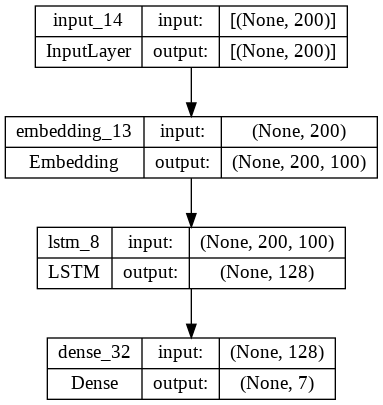

In [149]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [150]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
146/146 [==============================] - 4s 19ms/step - loss: 0.4362 - acc: 0.5048 - val_loss: 0.4241 - val_acc: 0.5071
Epoch 2/5
146/146 [==============================] - 2s 16ms/step - loss: 0.4145 - acc: 0.5138 - val_loss: 0.4253 - val_acc: 0.4921
Epoch 3/5
146/146 [==============================] - 2s 16ms/step - loss: 0.4129 - acc: 0.5185 - val_loss: 0.4207 - val_acc: 0.5105
Epoch 4/5
146/146 [==============================] - 2s 16ms/step - loss: 0.3849 - acc: 0.6146 - val_loss: 0.3776 - val_acc: 0.7502
Epoch 5/5
146/146 [==============================] - 2s 16ms/step - loss: 0.2981 - acc: 0.7839 - val_loss: 0.2888 - val_acc: 0.8108


In [151]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

183/183 [==============================] - 1s 6ms/step - loss: 0.2897 - acc: 0.8068
Test Score: 0.28971925377845764
Test Accuracy: 0.8068493008613586


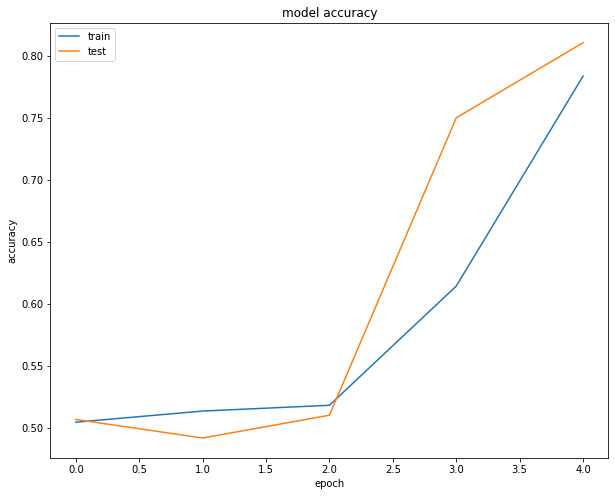

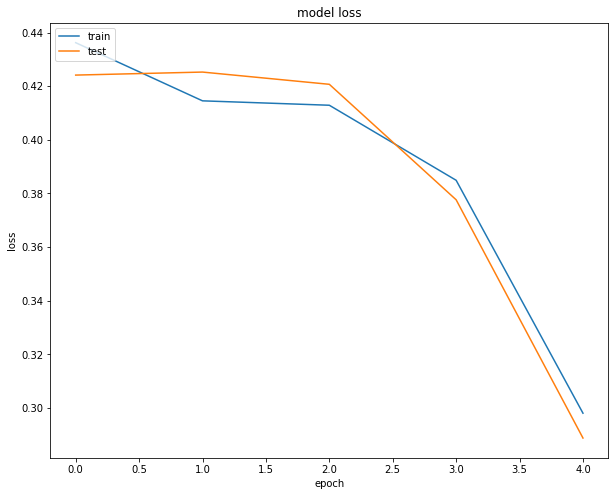

In [152]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Stacked RNN

Epoch 1/5
146/146 [==============================] - 24s 159ms/step - loss: 0.4293 - acc: 0.4993 - val_loss: 0.4271 - val_acc: 0.4810
Epoch 2/5
146/146 [==============================] - 22s 154ms/step - loss: 0.4200 - acc: 0.5026 - val_loss: 0.4230 - val_acc: 0.5058
Epoch 3/5
146/146 [==============================] - 23s 155ms/step - loss: 0.4175 - acc: 0.5127 - val_loss: 0.4279 - val_acc: 0.5075
Epoch 4/5
146/146 [==============================] - 22s 152ms/step - loss: 0.4296 - acc: 0.5110 - val_loss: 0.4259 - val_acc: 0.5060
Epoch 5/5
183/183 [==============================] - 3s 16ms/step - loss: 0.4420 - acc: 0.5212
Test Score: 0.44199293851852417
Test Accuracy: 0.5212329030036926


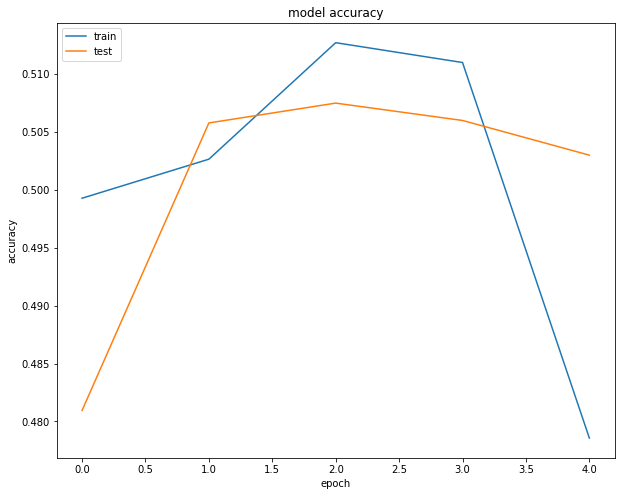

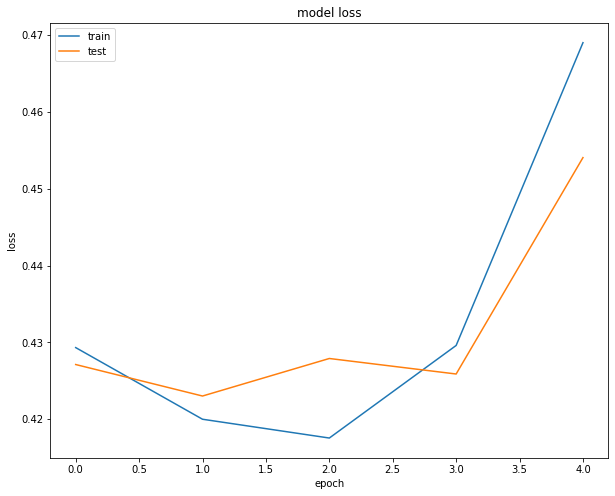

In [153]:
import tensorflow
from keras.models import Sequential 
from keras.layers import Embedding
from keras.layers import Dense, SimpleRNN

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
RNN_Layer_1 = SimpleRNN(128)(embedding_layer)
RNN_Layer_2 = SimpleRNN(128)(embedding_layer)
RNN_Layer_3 = SimpleRNN(128)(embedding_layer)
dense_layer_1 = Dense(7, activation='sigmoid')(RNN_Layer_3)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Stacked FeedForward Neural network

In [154]:
import tensorflow
from keras.models import Sequential 
from keras.layers import Embedding
from keras.layers import Dense, Flatten

deep_inputs = Input(shape=(maxlen,))
model = Sequential()



model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False,input_length=200))
#model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu')) 
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 200, 100)          5268600   
                                                                 
 flatten_2 (Flatten)         (None, 20000)             0         
                                                                 
 dense_34 (Dense)            (None, 16)                320016    
                                                                 
 dense_35 (Dense)            (None, 16)                272       
                                                                 
 dense_36 (Dense)            (None, 7)                 119       
                                                                 
Total params: 5,589,007
Trainable params: 320,407
Non-trainable params: 5,268,600
_________________________________________________________________
None


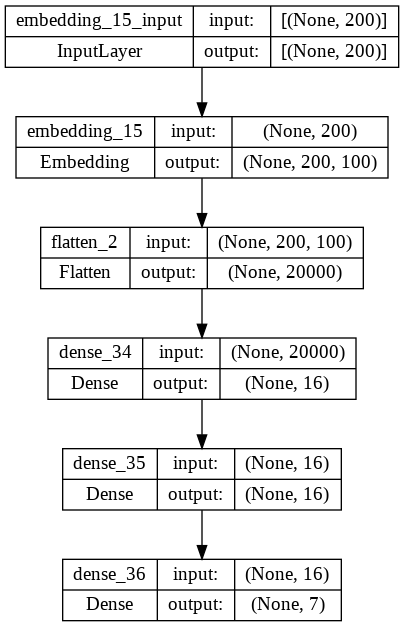

In [155]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [156]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])


Epoch 1/5
146/146 [==============================] - 1s 5ms/step - loss: 0.3326 - accuracy: 0.7224 - val_loss: 0.2814 - val_accuracy: 0.7920
Epoch 2/5
146/146 [==============================] - 1s 4ms/step - loss: 0.2436 - accuracy: 0.8323 - val_loss: 0.2708 - val_accuracy: 0.8031
Epoch 3/5
146/146 [==============================] - 1s 4ms/step - loss: 0.2122 - accuracy: 0.8613 - val_loss: 0.2757 - val_accuracy: 0.8146
Epoch 4/5
146/146 [==============================] - 1s 4ms/step - loss: 0.1919 - accuracy: 0.8774 - val_loss: 0.2854 - val_accuracy: 0.8084
Epoch 5/5
183/183 [==============================] - 0s 2ms/step - loss: 0.2801 - accuracy: 0.8154
Test Score: 0.28014644980430603
Test Accuracy: 0.8154109716415405


---
Transformer

In [157]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [158]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [159]:
deep_inputs = Input(shape=(maxlen,))
embed_dim = 200  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 200  # Hidden layer size in feed forward network inside transformer

#inputs = layers.Input(shape=(maxlen,))
#embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)
x = embedding_layer(deep_inputs)
transformer_block = TransformerBlock(100, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(7, activation="sigmoid")(x)

model = keras.Model(inputs=deep_inputs, outputs=outputs)
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 200)]             0         
                                                                 
 embedding_16 (Embedding)    (None, 200, 100)          5268600   
                                                                 
 transformer_block_6 (Transf  (None, 200, 100)         121400    
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_5   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_24 (Dropout)        (None, 100)               0         
                                                                 
 dense_39 (Dense)            (None, 20)                202

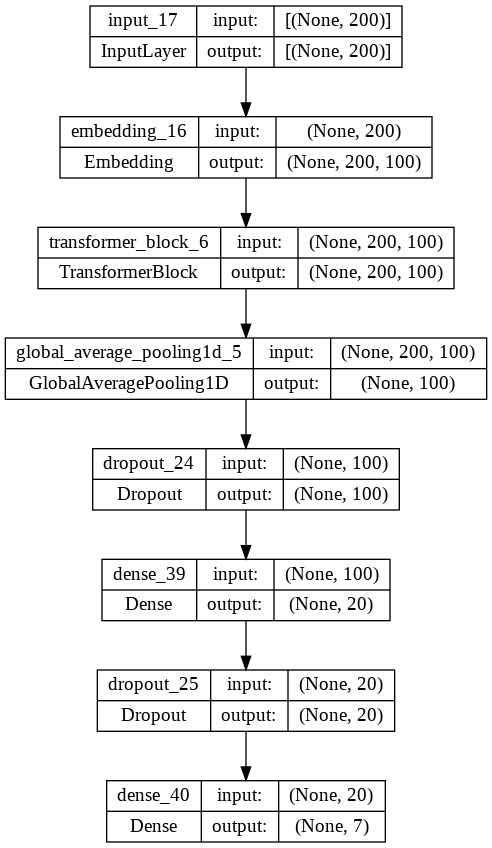

In [160]:
keras.utils.plot_model(model, show_shapes=True)

In [161]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/5
146/146 [==============================] - 6s 32ms/step - loss: 0.4998 - accuracy: 0.4551 - val_loss: 0.2338 - val_accuracy: 0.8253
Epoch 2/5
146/146 [==============================] - 4s 30ms/step - loss: 0.2480 - accuracy: 0.7779 - val_loss: 0.2283 - val_accuracy: 0.7896
Epoch 3/5
146/146 [==============================] - 4s 30ms/step - loss: 0.2197 - accuracy: 0.8259 - val_loss: 0.1976 - val_accuracy: 0.8688
Epoch 4/5
146/146 [==============================] - 5s 31ms/step - loss: 0.2063 - accuracy: 0.8444 - val_loss: 0.1978 - val_accuracy: 0.8660
Epoch 5/5
183/183 [==============================] - 1s 6ms/step - loss: 0.1901 - accuracy: 0.8728
Test Score: 0.19006139039993286
Test Accuracy: 0.8727739453315735


In [162]:
p = model.predict(testing)
p

485/485 [==============================] - 2s 4ms/step


array([[4.8122254e-01, 2.8490562e-03, 3.9040867e-02, ..., 8.3289042e-02,
        3.4793580e-03, 5.5992216e-01],
       [9.7279355e-02, 3.3785042e-04, 2.5846075e-02, ..., 9.3836458e-03,
        1.4099315e-03, 8.6870843e-01],
       [8.8924043e-02, 3.1408502e-04, 1.1425424e-02, ..., 1.0971900e-02,
        1.4132962e-03, 8.9953429e-01],
       ...,
       [5.5793226e-02, 7.8411867e-05, 7.5997170e-03, ..., 4.0140641e-03,
        3.9741368e-04, 9.2227405e-01],
       [8.2651156e-01, 1.8505074e-02, 5.3515333e-01, ..., 3.7897435e-01,
        8.5151866e-03, 3.8741611e-02],
       [3.7289586e-02, 2.5765243e-04, 1.4216963e-02, ..., 7.7766539e-03,
        1.3789934e-03, 9.3230683e-01]], dtype=float32)

In [113]:
pre = np.rint(p).astype(int)

In [166]:
test_data['id']

0        67673f1c9a136bac
1        a2d4a6f2158263d5
2        746ae24ef2936a1a
3        ad36d3359f45a866
4        53f699000b6287d3
               ...       
15489    473e89899ff9557f
15490    00c49503b35bb572
15491    4da52fd10c1771d4
15492    a5d0b624823afc56
15493    863fde83d453f88c
Name: id, Length: 15494, dtype: object

In [115]:
df_out = pd.DataFrame(pre,columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", "no_toxicity"])

In [163]:
df_out
# preprocess_text(test_data['comment_text'])

,toxic,severe_toxic,obscene,threat,insult,identity_hate,no_toxicity
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
15489,1,0,0,0,0,0,0
15490,0,0,0,0,0,0,1
15491,0,0,0,0,0,0,1
15492,1,0,0,0,0,0,0


In [171]:
df_out['comment_id'] = test_data['id']
df_out

,toxic,severe_toxic,obscene,threat,insult,identity_hate,no_toxicity,comment_id
0,1,0,0,0,0,0,0,67673f1c9a136bac
1,0,0,0,0,0,0,1,a2d4a6f2158263d5
2,0,0,0,0,0,0,1,746ae24ef2936a1a
3,0,0,0,0,0,0,1,ad36d3359f45a866
4,0,0,0,0,0,0,1,53f699000b6287d3
...,...,...,...,...,...,...,...,...
15489,1,0,0,0,0,0,0,473e89899ff9557f
15490,0,0,0,0,0,0,1,00c49503b35bb572
15491,0,0,0,0,0,0,1,4da52fd10c1771d4
15492,1,0,0,0,0,0,0,a5d0b624823afc56


In [172]:
df_out.to_csv('predicted.csv',index=False)